In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [3]:
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [4]:
max_review_len = max([len(s.split()) for s in sentences])

tokenizing data

In [5]:
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

In [6]:
vocab_size = len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_matrix(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

input_dim = max_review_len
print(input_dim)

2470


In [7]:
#Encoding the target column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [8]:
#first mistake: (NameError: name 'input_dim' is not defined) I changed it to 2000 as we gave the num_words

model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_review_len))
#If inputs are shaped (batch, ) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).
model.add(Flatten())

model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [9]:
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 67s 174ms/step - loss: 1.3729 - acc: 0.4649 - val_loss: 0.8798 - val_acc: 0.5034
Epoch 2/5
293/293 [==============================] - 50s 170ms/step - loss: 0.8437 - acc: 0.5327 - val_loss: 0.8487 - val_acc: 0.5200
Epoch 3/5
293/293 [==============================] - 50s 170ms/step - loss: 0.8120 - acc: 0.5514 - val_loss: 0.8380 - val_acc: 0.5236
Epoch 4/5
293/293 [==============================] - 50s 172ms/step - loss: 0.7888 - acc: 0.5718 - val_loss: 0.8362 - val_acc: 0.5175
Epoch 5/5
293/293 [==============================] - 50s 171ms/step - loss: 0.7693 - acc: 0.5877 - val_loss: 0.8436 - val_acc: 0.5202


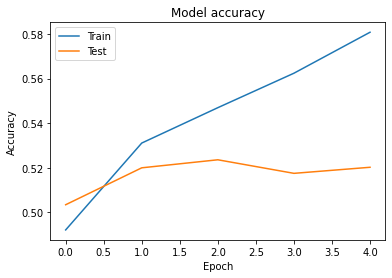

In [10]:
#4. Plot the loss and accuracy using history object.

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

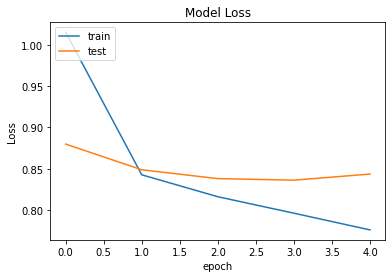

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()